<h1 style="color: Crimson;" > <center> ********La Distance de Mahalanobis****** </center></h1>
<h3 style="color : blue; text-align: right;">Réalisé par : Sabrine Hoiya </h3>

## <span style="color:	blue ">I.Définition la distance de Mahalanobis:</span>

En statistique, la distance de Mahalanobis est une mesure de distance mathématique introduite par Prasanta Chandra Mahalanobis en 1936. Elle est basée sur la corrélation entre des variables par lesquelles différents modèles peuvent être identifiés et analysés.

La distance de Mahalanobis est souvent utilisée pour la détection de données aberrantes dans un jeu de données, ou bien pour déterminer la cohérence de données fournies par un capteur par exemple : cette distance est calculée entre les données reçues et celles prédites par un modèle.

 <img src="distance.JPG">

## <span style="color:	blue ">II.Application de la distance de Mahalanobis:</span>

In [9]:

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [10]:
x1 = np.random.normal(0, 5, 1000)
x2 = np.random.normal(0, 1, 1000)

In [11]:
df = pd.DataFrame({
    'x1': x1, 
    'x2': x2
})

<AxesSubplot:xlabel='x1', ylabel='x2'>

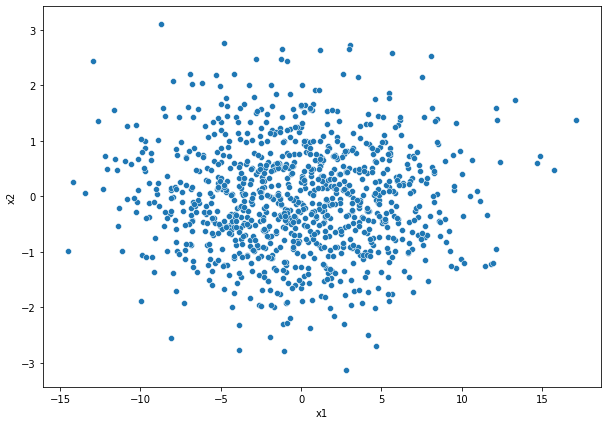

In [12]:
plt.figure(figsize=(10, 7))
sns.scatterplot(x='x1', y='x2', data=df)

In [13]:
def mahalanobis_distance(p, q, df):
    A = p - q
    B = (p - q).T
    covariance_matrix = np.array(df.cov())
    inverse_covariance_matrix = np.linalg.inv(covariance_matrix)
    return np.dot(np.dot(A, inverse_covariance_matrix), B)

In [14]:

def euclidean_distance(p, q):
    return np.sqrt(np.sum((p - q) ** 2))

In [15]:
df


,x1,x2
0,5.919632,0.340437
1,0.023849,1.634361
2,1.680845,0.904353
3,-11.645087,1.556138
4,0.748406,0.484372
...,...,...
995,8.976245,0.641063
996,-0.899390,0.044504
997,11.933102,-1.205663
998,-5.012256,0.862984


In [16]:
x1_min_arg = x1[np.argsort(x1)[0]]
x1_max_arg = x1[np.argsort(x1)[-1]]
x2_min_arg, x2_max_arg = x2[np.where((x2 > np.mean(x2) - .2) & (x2 < np.mean(x2) + .2))[0][0:2]]



<AxesSubplot:xlabel='x1', ylabel='x2'>

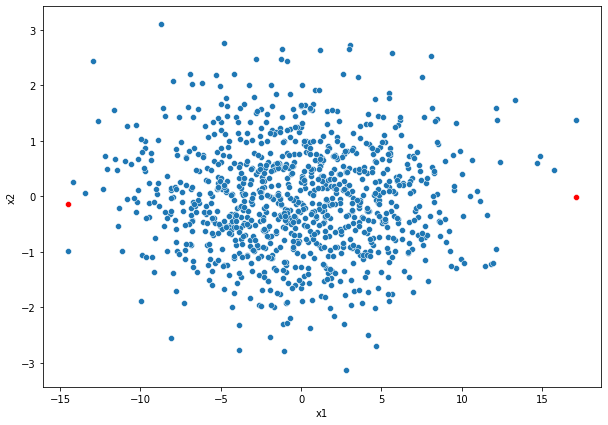

In [17]:
plt.figure(figsize=(10, 7))
sns.scatterplot(x='x1', y='x2', data=df)
sns.scatterplot(x=[x1_min_arg, x1_max_arg], y=[x2_min_arg, x2_max_arg], color='red')

In [18]:
p = np.array([[x1_min_arg, x2_min_arg]])
q = np.array([[x1_max_arg, x2_max_arg]])


In [19]:
euclidean_distance(p, q)

31.571257922937743

In [20]:
mahalanobis_distance(p, q, df)

array([[39.0885712]])

In [22]:

filepath = 'https://raw.githubusercontent.com/selva86/datasets/master/diamonds.csv'
df = pd.read_csv(filepath).iloc[:, [0,4,6]]

In [23]:
df.head(3)

,carat,depth,price
0,0.23,61.5,326
1,0.21,59.8,326
2,0.23,56.9,327


In [ ]:
df.iloc[11].values